In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
from pathlib import Path
import os
import PIL
import pickle
import cv2
import random
import PIL.Image
from skimage import io
from skimage.transform import resize
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

In [18]:
directory = Path("datasets/flowers")

flowers = []
features = []
labels = []

# Size Of The Image
size = 128,128

# Iterating Over Directory To Extract Sub Directories
for dir in directory.iterdir():
  flowers.append(dir.name)
  print(dir.name)
# Iterating Over Sub Directories To Extract Lables
  for imgpath in dir.iterdir():
    if imgpath.name.endswith("jpg"):
      labels.append(dir.name)
      img = image.load_img(imgpath, target_size = size)
      img_arr = image.img_to_array(img)
      im = tf.image.rgb_to_grayscale(img_arr)
      features.append(im)
  else:
    continue

daisy
dandelion
rose
sunflower
tulip


In [4]:
import random
def draw_flower():
  fig,ax=plt.subplots(5,2)
  fig.set_size_inches(15,15)

  for i in range(5):
    for j in range(2):
      l = random.randint(0, len(labels))
      seq_img = features.squeeze()
      ax[i,j].imshow(seq_img[l])
      ax[i,j].set_title(labels[l])
  plt.tight_layout()

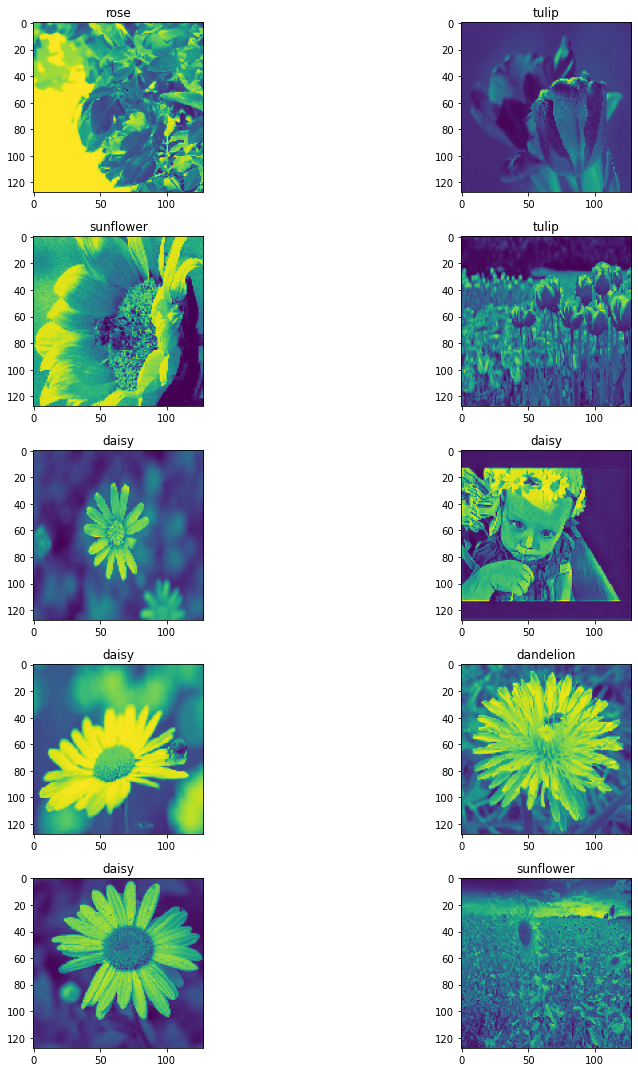

In [34]:
draw_flower()

In [19]:
features = np.array(features)
features.shape

(4323, 128, 128, 1)

In [20]:
labels = np.array(labels)
labels.shape

(4323,)

In [21]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size = 0.4, random_state = 42)

In [22]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(2593, 128, 128, 1)
(2593,)
(1730, 128, 128, 1)
(1730,)


In [23]:
image_size = train_data.shape[1]
train_data = train_data.reshape((-1, image_size * image_size))
test_data = test_data.reshape((-1, image_size * image_size))

In [24]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [25]:
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(2593, 16384)
(1730, 16384)
(2593,)
(1730,)


In [26]:
le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
test_labels = le.fit_transform(test_labels)

In [27]:
print(train_labels.shape)
print(test_labels.shape)

(2593,)
(1730,)


In [28]:
model = Sequential()
model.add(Dense(1024, activation = 'relu', input_shape = (train_data.shape[-1],)))
model.add(Dropout(0.02))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.02))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              16778240  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3

In [29]:
model.compile(optimizer = Adam(0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [30]:
history = model.fit(train_data, train_labels, epochs = 100, batch_size = 128)

Epoch 1/100
21/21 [==============================] - 7s 164ms/step - loss: 2.4137 - accuracy: 0.2097
Epoch 2/100
21/21 [==============================] - 3s 155ms/step - loss: 1.6760 - accuracy: 0.2318
Epoch 3/100
21/21 [==============================] - 3s 156ms/step - loss: 1.5592 - accuracy: 0.2744
Epoch 4/100
21/21 [==============================] - 3s 156ms/step - loss: 1.5737 - accuracy: 0.2704
Epoch 5/100
21/21 [==============================] - 3s 155ms/step - loss: 1.5458 - accuracy: 0.2757
Epoch 6/100
21/21 [==============================] - 3s 156ms/step - loss: 1.5338 - accuracy: 0.2858
Epoch 7/100
21/21 [==============================] - 3s 154ms/step - loss: 1.5340 - accuracy: 0.2908
Epoch 8/100
21/21 [==============================] - 3s 154ms/step - loss: 1.5219 - accuracy: 0.3040
Epoch 9/100
21/21 [==============================] - 3s 154ms/step - loss: 1.5014 - accuracy: 0.3044
Epoch 10/100
21/21 [==============================] - 3s 155ms/step - loss: 1.5236 - accura

21/21 [==============================] - 4s 169ms/step - loss: 0.4336 - accuracy: 0.8347
Epoch 82/100
21/21 [==============================] - 3s 159ms/step - loss: 0.5539 - accuracy: 0.7893
Epoch 83/100
21/21 [==============================] - 3s 151ms/step - loss: 0.6963 - accuracy: 0.7472
Epoch 84/100
21/21 [==============================] - 3s 160ms/step - loss: 0.5585 - accuracy: 0.7896
Epoch 85/100
21/21 [==============================] - 3s 158ms/step - loss: 0.4785 - accuracy: 0.8221
Epoch 86/100
21/21 [==============================] - 3s 164ms/step - loss: 0.3756 - accuracy: 0.8653
Epoch 87/100
21/21 [==============================] - 4s 185ms/step - loss: 0.4372 - accuracy: 0.8372
Epoch 88/100
21/21 [==============================] - 3s 154ms/step - loss: 0.4654 - accuracy: 0.8228
Epoch 89/100
21/21 [==============================] - 3s 160ms/step - loss: 0.4040 - accuracy: 0.8472
Epoch 90/100
21/21 [==============================] - 3s 167ms/step - loss: 0.3798 - accuracy: 

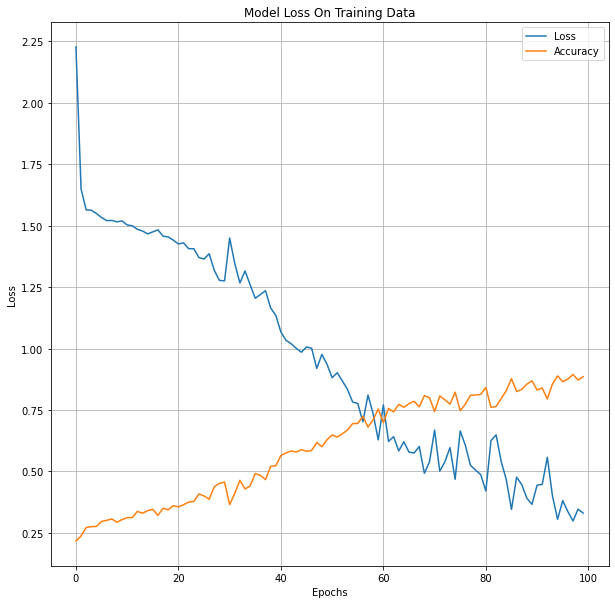

In [31]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss On Training Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Loss', 'Accuracy'])
plt.grid()
plt.show()

In [32]:
predictions = model.predict(test_data)
predictions

array([[9.54814181e-02, 8.93845141e-01, 9.10027605e-03, 8.87554605e-04,
        6.85532519e-04],
       [2.70530302e-03, 9.92229879e-01, 5.05027128e-03, 3.22340014e-07,
        1.42338358e-05],
       [4.60979417e-02, 9.49192345e-01, 4.56705270e-03, 2.59319058e-05,
        1.16750525e-04],
       ...,
       [1.30874885e-03, 7.35446345e-04, 1.34422604e-04, 9.96907413e-01,
        9.14016913e-04],
       [4.47999775e-01, 4.77926672e-01, 6.27288520e-02, 3.29438853e-03,
        8.05037003e-03],
       [7.33906850e-02, 3.50315034e-01, 1.37770295e-01, 8.24248642e-02,
        3.56099159e-01]], dtype=float32)

In [33]:
testing = model.evaluate(test_data, test_labels)
testing

55/55 [==============================] - 1s 20ms/step - loss: 3.3597 - accuracy: 0.2884


[3.3597395420074463, 0.2884393036365509]